# Linear Regression from scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_x = pd.read_csv('Training Data/Linear_X_Train.csv')
df_y = pd.read_csv('Training Data/Linear_Y_Train.csv')


In [4]:
df_x = df_x.values
df_y = df_y.values
x = df_x.reshape((-1,))
y = df_y.reshape((-1,))

In [5]:
print(x.shape)
print(y.shape)

(3750,)
(3750,)


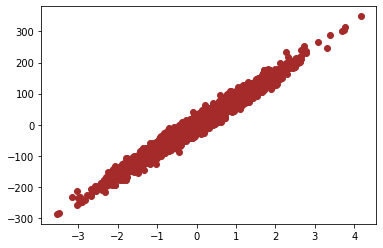

In [6]:
x = (x-x.mean())/x.std()
y = y
plt.scatter(x,y,color='brown')
plt.show()

<h1>Gradient Descent Algorithm</h1>

In [7]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [8]:
def error(x,y,theta):
    error = 0
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        error += (hx-y[i])**2
    return error

In [9]:
def gradient(x,y,theta):
    grad = np.zeros((2,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
    return grad

In [10]:
def gradientDescent(x,y,learning_rate = 0.00001):
    theta = np.array([-300.0,0.0])
    error_list = []
    theta_list = []
    itr = 0
    maxItr = 300
    while itr<=maxItr:
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        theta_list.append(grad)
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        itr += 1
    return theta, error_list, theta_list

In [11]:
final_theta, error_list, theta_list = gradientDescent(x,y)

In [12]:
print(error_list)

[363700017.8747671, 336986668.9486804, 312239255.5451248, 289313097.096737, 268074160.62165898, 248398277.12779394, 230170415.68480545, 213284010.91988772, 197640340.00563806, 183147945.497733, 169722100.64814475, 157284314.0679557, 145761870.84390262, 135087407.4258696, 125198517.80000763, 116037388.64504863, 107550461.33883753, 99688118.83906786, 92404395.6076407, 85656708.8827763, 79405609.72781989, 73614552.40129855, 68249680.69990087, 63279630.02527798, 58675344.017490625, 54409904.68308894, 50458375.02470307, 46797653.25211438, 43406337.7224771, 40264601.82009908, 37354078.0442865, 34657750.627600186, 32159856.05673573, 29845790.91444563, 27702026.50372117, 25716029.755098313, 23876189.954694502, 22171750.864601642, 20592747.838795297, 19129949.56691939, 17774804.10536438, 16519388.880120602, 15356364.369109713, 14278931.19320595, 13280790.365091361, 12356106.463545863, 11499473.517879704, 10705883.403058676, 9970696.56075025, 9289614.875117974, 8658656.544787666, 8074132.8040801

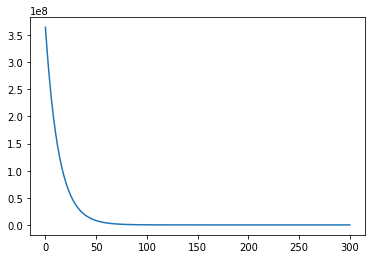

In [13]:
plt.plot(error_list)
plt.show()

In [14]:

d = pd.read_csv("Testing Data/Linear_X_Test.csv")
d = d.values

test = d.reshape((-1,))
print(test)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


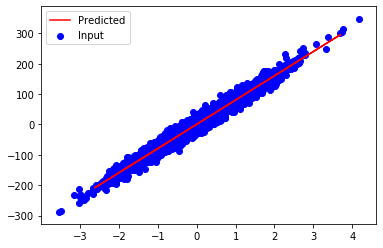

In [15]:
plt.plot(test, hypothesis(test,final_theta),color = 'Red',label='Predicted')
plt.scatter(x,y,color = 'blue',label = 'Input')
plt.legend()
plt.show()

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(df_x,df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
output = model.predict(df_x)

In [20]:
bias = model.intercept_
coeff = model.coef_

print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [21]:
model.score(df_x,df_y)

0.9709612233822353

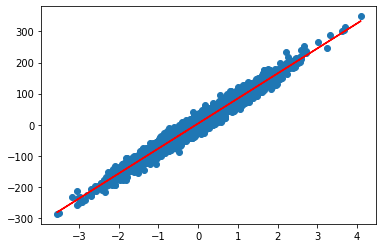

In [22]:
plt.scatter(df_x,df_y,label='data')
plt.plot(df_x,output,color='red',label='prediction')

In [23]:
X_test = pd.read_csv('Testing Data/Linear_X_Test.csv')

In [24]:
op = model.predict(X_test)

In [25]:
op = pd.DataFrame(op)

In [26]:
op

,0
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285
...,...
1245,-9.808053
1246,78.812578
1247,14.038203
1248,-18.666169
